<a href="https://colab.research.google.com/github/EduardoZiul/T-picos-especiais-em-projeto-4/blob/main/Atividade_2_Topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regressao Linear para Estimar a Eficiência de um Trocador de Calor

# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Gerando dados simulados (exemplo)
np.random.seed(42)
n = 1000

t_quente = np.random.normal(150, 10, n)  # Temperatura do fluido quente (°C)
t_frio = np.random.normal(30, 5, n)      # Temperatura do fluido frio (°C)
vazao_quente = np.random.normal(2.5, 0.5, n)  # Vazão mássica fluido quente (kg/s)
vazao_frio = np.random.normal(3.0, 0.6, n)    # Vazão mássica fluido frio (kg/s)


In [3]:
# Eficiência simulada com um modelo linear + ruído ainda menor para aumentar mais o R²
eficiencia = (
    0.4 * t_quente
    - 0.2 * t_frio
    + 5 * vazao_quente
    + 3 * vazao_frio
    + np.random.normal(0, 1, n)  # ruído ainda menor
)

data = pd.DataFrame({
    'T_quente': t_quente,
    'T_frio': t_frio,
    'Vazao_quente': vazao_quente,
    'Vazao_frio': vazao_frio,
    'Eficiencia': eficiencia
})

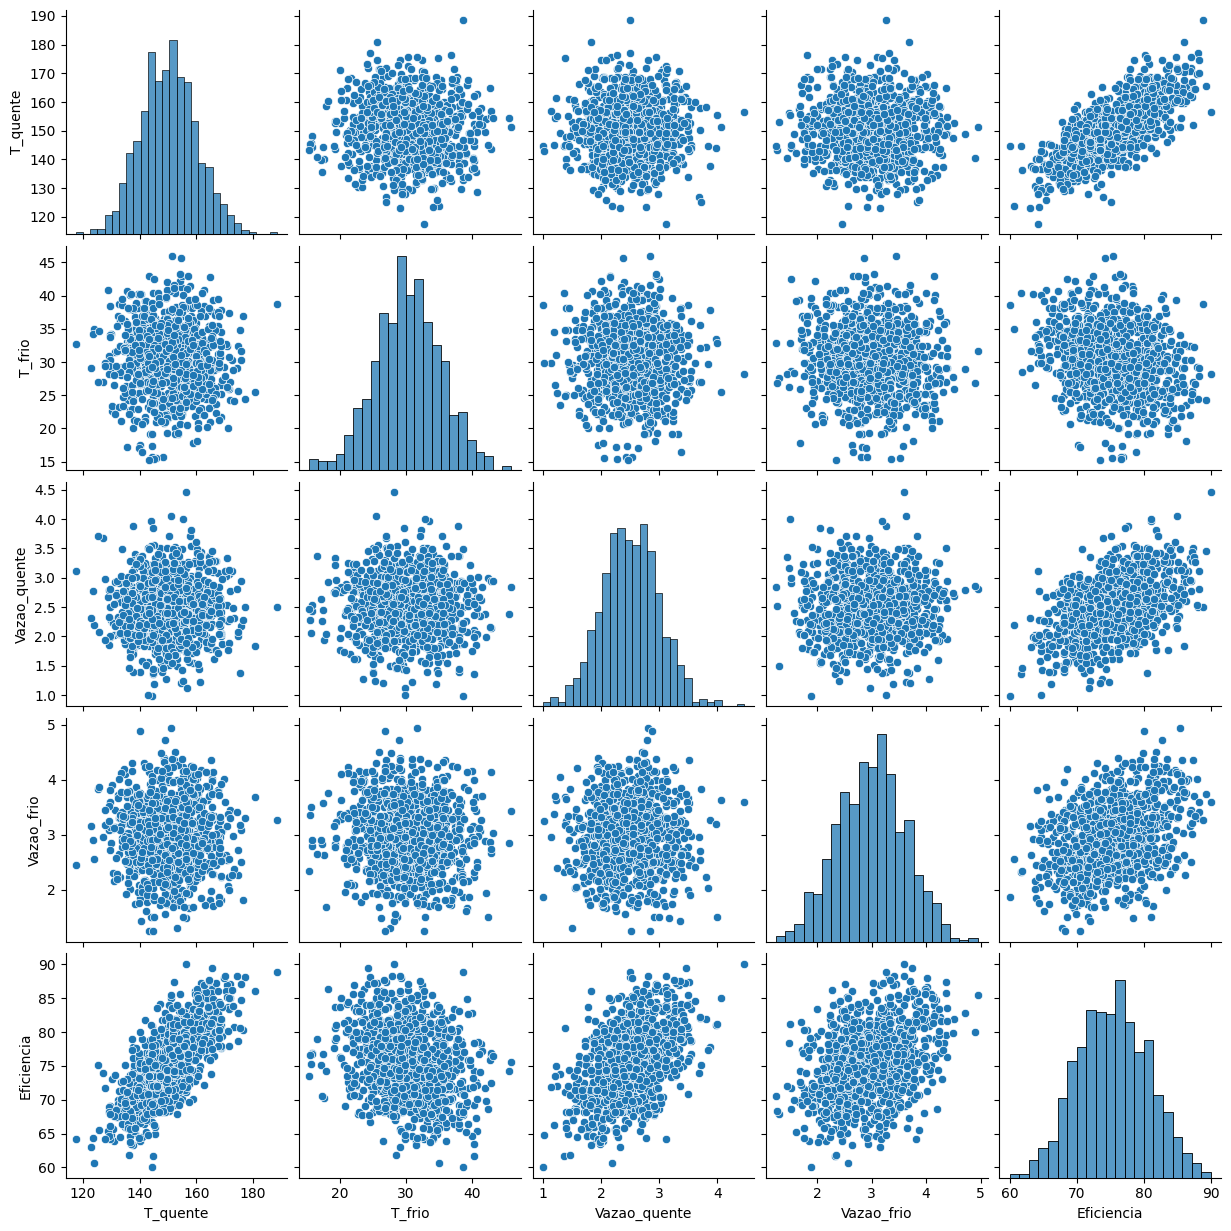

LinearRegression()

In [4]:
# Visualização dos dados
sns.pairplot(data)
plt.show()

# Separando variáveis independentes e dependente
X = data[['T_quente', 'T_frio', 'Vazao_quente', 'Vazao_frio']]
y = data['Eficiencia']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)


Coeficientes: [ 0.39700162 -0.20432449  5.09988551  3.04521515]
Intercepto: 0.13490423391898787
MSE: 0.9187792466268564
R²: 0.961038282003402


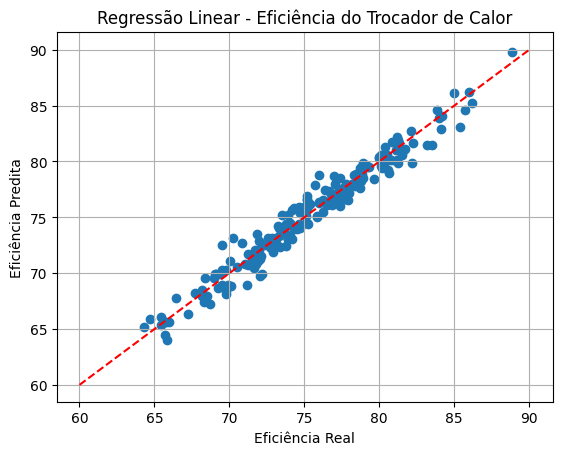

In [5]:
# Predição
y_pred = modelo.predict(X_test)

# Avaliação do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Gráfico real vs predito
plt.scatter(y_test, y_pred)
plt.xlabel("Eficiência Real")
plt.ylabel("Eficiência Predita")
plt.title("Regressão Linear - Eficiência do Trocador de Calor")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
